TODO LIST 17 OKT 2022
- NYOBA PAKE ACT FUNC NYA SOFTMAX, TRS CR TAU CARANYA NGESHOW PRESENTASE TIAP NEURON NYA (KLO DISINI ADA 6 NEURON ALIAS 6 LABEL OUTPUT)
- LOSS FUNC NYA COBA PAKE MAE BIAR KELIATAN RIL NYA BEDA BERAPA DARI DATA ASLI DENGAN HASIL PREDIKSI
- COBA BIKIN 3 SKENARIO; PAKE DATA YG NO KINCIR&BUSA SAJA; PAKE DATA YG ADA KINCIR&BUSA SAJA; PAKE DATA CAMPURAN (EMANG HARUS DI FILTER SATU2 MANUAL GAMBAR NYA)
- GAMBAR NYA GPP DI RESIZE SEKECIL MNGKN DIMENSION NYA KRN AKHIRNYA AKAN DI RESIZE JG JDI LETS SAY 224X224X3
- ALTERNATIF -> OUTPUT RELU DR MOBILENET DIPAKSA JADI 100% PAKE SOFTMAX

IMPORT LIBRARY & MOUNT DRIVE

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical, load_img, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pickle
from scipy.special import softmax
%matplotlib inline

In [ ]:
try:
  device_name = tf.test.gpu_device_name()
  if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
except:
  print('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
# Load dataset from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

LOAD & PRE-PROCESS DATASET

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TUGAS AKHIR/LABEL_DATASET.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,Id,Green Algae,Blue Green Algae,Chrysophyta,Euglenophyta,Dinoflagellata,Protozoa
0,1.JPG,98.4,0.4,0.8,0,0.4,0
1,2.JPG,98.4,0.4,0.8,0,0.4,0
2,3.JPG,98.4,0.4,0.8,0,0.4,0
3,4.JPG,98.4,0.4,0.8,0,0.4,0
4,5.JPG,98.4,0.4,0.8,0,0.4,0


In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = load_img('/content/drive/MyDrive/Colab Notebooks/TUGAS AKHIR/DATASET/DATASET_TUGAS_AKHIR/'+train['Id'][i],
                   target_size=(160,160,3))
    img = img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

# np.save("TRAIN_IMAGE_ARRAY.pkl", X)

# with open('TRAIN_IMAGE.pkl', 'wb') as f:
#   pickle.dump(X, f)

100%|██████████| 2394/2394 [29:41<00:00,  1.34it/s]


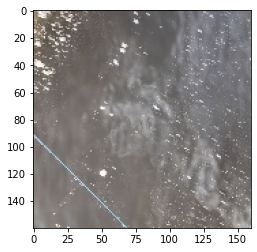

In [ ]:
plt.imshow(X[2390])

In [ ]:
train['Green Algae'][2390]

61.9

In [ ]:
y = np.array(train.drop(['Id'],axis=1))
y.shape

(2394, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1915, 160, 160, 3) (479, 160, 160, 3) (1915, 6) (479, 6)


MODEL (RAW CNN)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(160,160,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

NameError: ignored

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
60/60 [==============================] - 94s 2s/step - loss: 10.2193 - mean_absolute_error: 10.2193 - val_loss: 9.4615 - val_mean_absolute_error: 9.4615
Epoch 2/10
60/60 [==============================] - 88s 1s/step - loss: 6.9609 - mean_absolute_error: 6.9609 - val_loss: 8.2231 - val_mean_absolute_error: 8.2231
Epoch 3/10
60/60 [==============================] - 90s 2s/step - loss: 6.6038 - mean_absolute_error: 6.6038 - val_loss: 9.6632 - val_mean_absolute_error: 9.6632
Epoch 4/10
60/60 [==============================] - 91s 2s/step - loss: 6.4754 - mean_absolute_error: 6.4754 - val_loss: 8.6739 - val_mean_absolute_error: 8.6739
Epoch 5/10
60/60 [==============================] - 90s 1s/step - loss: 6.2125 - mean_absolute_error: 6.2125 - val_loss: 8.0155 - val_mean_absolute_error: 8.0155
Epoch 6/10
60/60 [==============================] - 90s 2s/step - loss: 6.2973 - mean_absolute_error: 6.2973 - val_loss: 9.7483 - val_mean_absolute_error: 9.7483
Epoch 7/10
60/60 [========

MODEL (MOBILENETV2)

In [ ]:
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=(160,160,3), include_top=False, weights='imagenet')
MobileNetV2.trainable = True

# Set untrainable layers (layer 1-60 from 154)
for layer in MobileNetV2.layers[:10]:
  layer.trainable = False

inputs = tf.keras.Input(shape=(160, 160, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = MobileNetV2(x, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(6, activation='relu')(x)
# outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# Optimize model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
                loss="mean_absolute_error",metrics=['mean_absolute_error'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0        

In [ ]:
epoch = 10
es = EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, patience=8)
history = model.fit(
      X_train, y_train,
      epochs=epoch,
      validation_data=(X_test, y_test),
      callbacks=es)
model.save('MobileNetV2_Relu.h5')

Epoch 1/10
60/60 [==============================] - 20s 119ms/step - loss: 10.9424 - mean_absolute_error: 10.9424 - val_loss: 5.9198 - val_mean_absolute_error: 5.9198
Epoch 2/10
60/60 [==============================] - 5s 85ms/step - loss: 3.7903 - mean_absolute_error: 3.7903 - val_loss: 2.6869 - val_mean_absolute_error: 2.6869
Epoch 3/10
60/60 [==============================] - 5s 86ms/step - loss: 2.7341 - mean_absolute_error: 2.7341 - val_loss: 2.4995 - val_mean_absolute_error: 2.4995
Epoch 4/10
60/60 [==============================] - 5s 86ms/step - loss: 2.5005 - mean_absolute_error: 2.5005 - val_loss: 2.4970 - val_mean_absolute_error: 2.4970
Epoch 5/10
60/60 [==============================] - 5s 86ms/step - loss: 2.4399 - mean_absolute_error: 2.4399 - val_loss: 2.3555 - val_mean_absolute_error: 2.3555
Epoch 6/10
60/60 [==============================] - 5s 86ms/step - loss: 2.3309 - mean_absolute_error: 2.3309 - val_loss: 2.3987 - val_mean_absolute_error: 2.3987
Epoch 7/10
60/60 [

TESTING

In [ ]:
img = load_img('26_B1.JPG',target_size=(160,160,3))
img = img_to_array(img)
img = img/255

In [ ]:
prob_result = model.predict(img.reshape(1,160,160,3))

# Untuk softmax
# prob_result = softmax(proba) 
sum = np.sum(prob_result)

print("Composition :")
print("Green algae : ", prob_result[0][0])
print("Blue Green algae : ", prob_result[0][1])
print("Chrysophyta algae : ", prob_result[0][2])
print("Euglenophyta : ", prob_result[0][3])
print("Dinoflagellata : ", prob_result[0][4])
print("Protozoa : ", prob_result[0][5])
print("Sum of the probabilites: ", sum)
print("\n")

print("Composition (after make the sum to 100):")
print("Green algae : ", prob_result[0][0]/sum)
print("Blue Green algae : ", prob_result[0][1]/sum)
print("Chrysophyta algae : ", prob_result[0][2]/sum)
print("Euglenophyta : ", prob_result[0][3]/sum)
print("Dinoflagellata : ", prob_result[0][4]/sum)
print("Protozoa : ", prob_result[0][5]/sum)
print("Sum of the probabilites: ", 100)

1/1 [==============================] - 0s 21ms/step
Composition :
Green algae :  88.680084
Blue Green algae :  4.909602
Chrysophyta algae :  1.8692467
Euglenophyta :  0.0
Dinoflagellata :  0.0
Protozoa :  0.0
Sum of the probabilites:  95.45893


Composition (after make the sum to 100):
Green algae :  0.9289868
Blue Green algae :  0.051431563
Chrysophyta algae :  0.019581685
Euglenophyta :  0.0
Dinoflagellata :  0.0
Protozoa :  0.0
Sum of the probabilites:  100


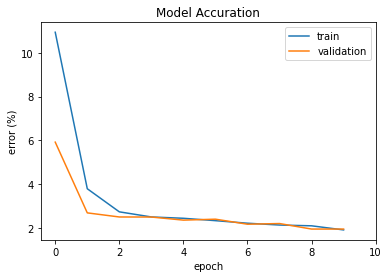

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.xticks(np.arange(0, epoch+1, 2))
plt.title("Model Accuration")
plt.xlabel('epoch')
plt.ylabel('error (%)')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()